# **IMPORT LIBRERIE**

In [ ]:
!pip install pandas
!pip install seaborn
!pip install sklearn

In [42]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
!pip install sklearn
!pip install -U scikit-learn scipy matplotlib


In [ ]:

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# **LETTURA DEL DATASET**

In [19]:
stress_train_df = pd.read_csv("stress_train.csv")
stress_test_df = pd.read_csv("stress_test.csv")
combine = [stress_train_df, stress_test_df]
print(stress_test_df)

    anxiety_level  self_esteem  mental_health_history  depression  headache  \
0              14           20                      0          11         2   
1              15            8                      1          15         5   
2              12           18                      1          14         2   
3              16           12                      1          15         4   
4              16           28                      0           7         2   
..            ...          ...                    ...         ...       ...   
95             19            7                      1          11         1   
96             15           14                      1          19         3   
97             17            7                      1          23         4   
98              6           27                      0           1         1   
99              9           23                      1          13         3   

    blood_pressure  sleep_quality  breathing_proble

In [21]:
stress_train_df.info()
print("_"*60)
stress_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1000 non-null   int64
 1   self_esteem                   1000 non-null   int64
 2   mental_health_history         1000 non-null   int64
 3   depression                    1000 non-null   int64
 4   headache                      1000 non-null   int64
 5   blood_pressure                1000 non-null   int64
 6   sleep_quality                 1000 non-null   int64
 7   breathing_problem             1000 non-null   int64
 8   noise_level                   1000 non-null   int64
 9   living_conditions             1000 non-null   int64
 10  safety                        1000 non-null   int64
 11  basic_needs                   1000 non-null   int64
 12  academic_performance          1000 non-null   int64
 13  study_load                    1000

In [22]:
stress_test_df.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000
mean,10.960000,18.560000,0.500000,12.530000,2.460000,2.150000,2.670000,2.770000,2.520000,2.630000,...,2.960000,2.890000,2.630000,2.780000,2.690000,2.010000,2.730000,2.770000,2.520000,0.9600
std,6.046821,9.232485,0.502519,7.953723,1.351542,0.808728,1.557355,1.254125,1.410495,1.031376,...,1.406479,1.413463,1.260551,1.446556,1.502153,0.979538,1.413178,1.347313,1.507423,0.8278
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000
25%,6.000000,11.750000,0.000000,5.750000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.0000
50%,11.000000,22.000000,0.500000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,2.500000,2.000000,2.000000,2.000000,2.000000,1.0000
75%,17.000000,27.000000,1.000000,19.250000,3.250000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.0000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.0000


# **ANALISI**


Asia: range 0 to 21

Self-esteem: range from 0 to 30

Mental health history: 0 if no mental health history, 1 if mental health history

Depression: range 0 to 27

Blood pressure: range 1 to 3 (1 is low, 2 is normal, 3 is high)

Stress level: range from 0 to 2 (0 low/no level, 1 medium level, 2 high level)

In [25]:
#                       Descriptive Statistics:
# How many students are in the dataset?
print("There are", len(stress_test_df), "students in the dataset.")
# What is the average anxiety level of students in the dataset?
print("The avarage anxiety level is:", round(stress_test_df.anxiety_level.mean(),2))
# How many students have reported a history of mental health issues?
print(len(stress_test_df.loc[stress_test_df.mental_health_history == 1]), "students reported a history of mental health issues.")

There are 100 students in the dataset.
The avarage anxiety level is: 10.96
50 students reported a history of mental health issues.


In [59]:
#                       Psychological Factors:
# How many students have a self-esteem level below the average?
below_avarage = len(stress_test_df.loc[stress_test_df["self_esteem"] < stress_test_df["self_esteem"].mean()])
print(below_avarage, "students have self esteem below avarage")
# What percentage of students have reported experiencing depression?
depressed = len(stress_test_df.loc[stress_test_df["depression"] >= 10])
print(round((depressed/len(stress_test_df))*100,2), "% of students reported moderate or higher levels of depression.")

41 students have self esteem below avarage
63.0 % of students reported moderate or higher levels of depression.


In [60]:
depression_counts = stress_test_df['depression'].value_counts()
print(depression_counts)

14    8
5     6
0     5
3     5
13    5
10    5
12    5
18    4
20    4
1     4
11    4
27    4
22    4
8     4
24    3
23    3
15    3
7     3
6     3
2     3
21    3
4     2
9     2
26    2
25    2
19    2
16    1
17    1
Name: depression, dtype: int64


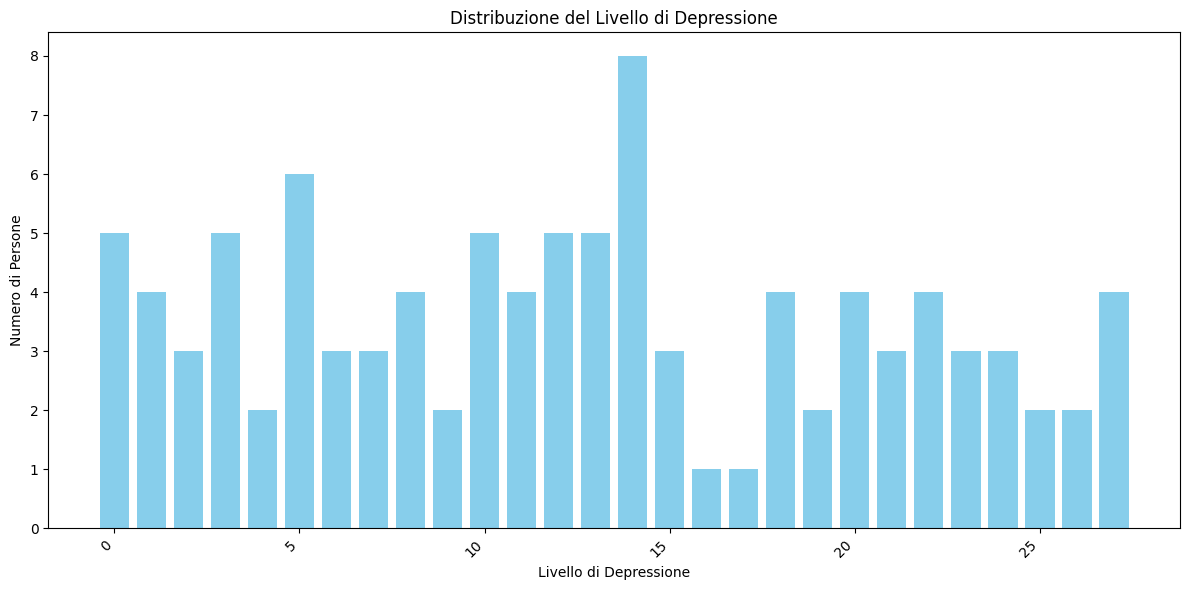

In [61]:
import matplotlib.pyplot as plt
depression_counts = stress_test_df['depression'].value_counts().sort_index()
# Creazione di un grafico a barre
plt.figure(figsize=(12, 6))
plt.bar(depression_counts.index, depression_counts.values, color='skyblue')
plt.xlabel('Livello di Depressione')
plt.ylabel('Numero di Persone')
plt.title('Distribuzione del Livello di Depressione')
plt.xticks(rotation=45, ha='right')  # Rotazione delle etichette sull'asse x per maggiore leggibilità
plt.tight_layout()

# Mostra il grafico
plt.show()

A bit of explanation to depression levels:

1-4 suggests minimal depression

5-9 suggests mild depression

10-14 suggests moderate depression

15-19 suggests moderately severe depression

20-27 suggests severe depression


In [27]:
#                     Physiological Factors:
# How many students experience headaches frequently?
print(len(stress_test_df.loc[stress_test_df["headache"] >2]), "students experience headaches frequently.")
# How many students rate their sleep quality as poor?
print(len(stress_test_df.loc[stress_test_df["sleep_quality"] < 3]), "students have bad sleep quality.")

49 students experience headaches frequently.
51 students have bad sleep quality.


In [56]:
sleep_quality_counts = stress_test_df['sleep_quality'].value_counts()
print(sleep_quality_counts)

1    32
4    20
2    17
5    17
3    12
0     2
Name: sleep_quality, dtype: int64


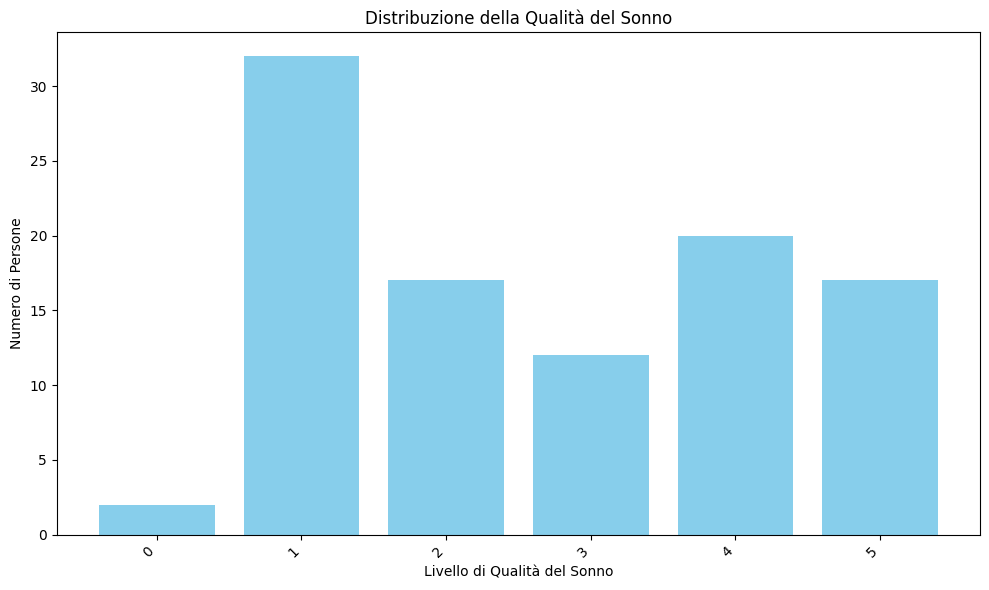

In [62]:
import matplotlib.pyplot as plt
sleep_quality_counts = stress_test_df['sleep_quality'].value_counts().sort_index()
# Creazione di un grafico a barre
plt.figure(figsize=(10, 6))
plt.bar(sleep_quality_counts.index, sleep_quality_counts.values, color='skyblue')
plt.xlabel('Livello di Qualità del Sonno')
plt.ylabel('Numero di Persone')
plt.title('Distribuzione della Qualità del Sonno')
plt.xticks(rotation=45, ha='right')  # Rotazione delle etichette sull'asse x per maggiore leggibilità
plt.tight_layout()

# Mostra il grafico
plt.show()

A bit of explanation to sleep quality levels:

0 Very Poor Sleep Quality

1 Poor Sleep Quality

2 Below Average Sleep Quality

3 Average Sleep Quality

4 Good Sleep Quality

5 Very Good Sleep Quality

In [28]:
#                     Environmental Factors:
# How many students live in conditions with high noise levels?
print(len(stress_test_df.loc[stress_test_df["noise_level"] >= 4]),"students live in high noise level areas.")
# What percentage of students feel unsafe in their living conditions?
print(round((len(stress_test_df.loc[stress_test_df["living_conditions"] <= 1])/len(stress_test_df))*100,2),"% of students feel unsafe in their living conditions.", sep = "")
# How many students have reported not having their basic needs met?
print(len(stress_test_df.loc[stress_test_df["basic_needs"] <= 2]),"students reported, that their basic needs didn't met.")

23 students live in high noise level areas.
15.0% of students feel unsafe in their living conditions.
44 students reported, that their basic needs didn't met.


In [29]:
#                     Academic Factors:
# How many students rate their academic performance as below average?
print(len(stress_test_df.loc[stress_test_df["academic_performance"] < stress_test_df["academic_performance"].mean()]), "students rate their academic performance below avarage.")
# What is the average study load reported by students?
print("The avarage study load reported by the students is ", round(stress_test_df["study_load"].mean(),2)," on a range of 0-5.", sep = "")
# How many students have concerns about their future careers?
print(len(stress_test_df.loc[stress_test_df["future_career_concerns"]>= 4]), "students have high concerns about their future careers.")

47 students rate their academic performance below avarage.
The avarage study load reported by the students is 2.63 on a range of 0-5.
36 students have high concerns about their future careers.


In [34]:
#                     Comparative Analysis:
# Is there a correlation between anxiety level and academic performance?
ac_perf = round(stress_test_df["anxiety_level"].corr(stress_test_df["academic_performance"]),2)
print("The correlation between anxiety level and academic perofmance is ", ac_perf)
# Do students with poor sleep quality also report higher levels of depression?
sleep_dep = round(stress_test_df["sleep_quality"].corr(stress_test_df["depression"]),2)
print("The correlation between depression and sleep quality is ", sleep_dep)
# Are students who experience bullying more likely to have a history of mental health issues?
bull_mental = round(stress_test_df["bullying"].corr(stress_test_df["mental_health_history"]), 2)
print("The correlation between bullying and history of mental illness is ",bull_mental)

The correlation between anxiety level and academic perofmance is  -0.73
The correlation between depression and sleep quality is  -0.74
The correlation between bullying and history of mental illness is  0.65


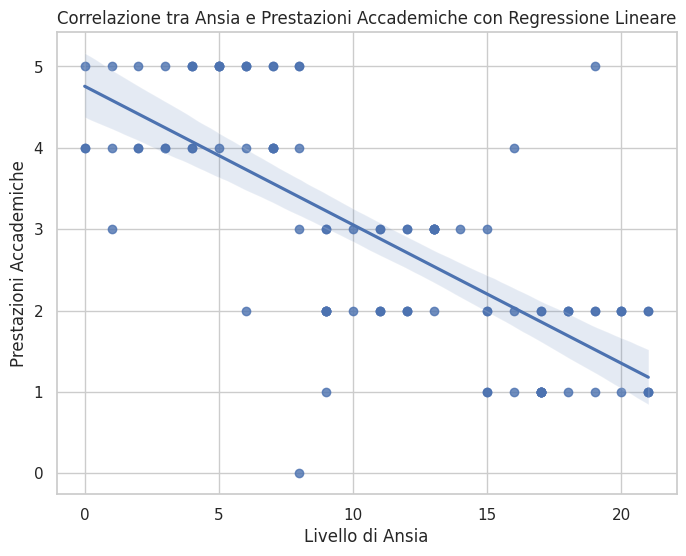

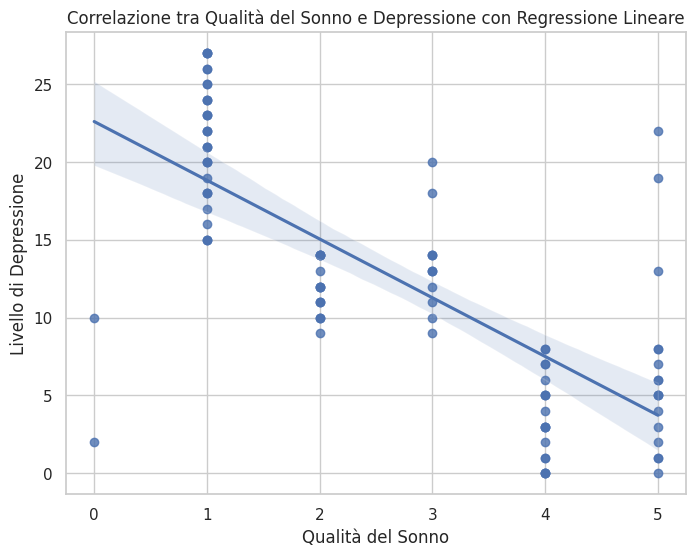

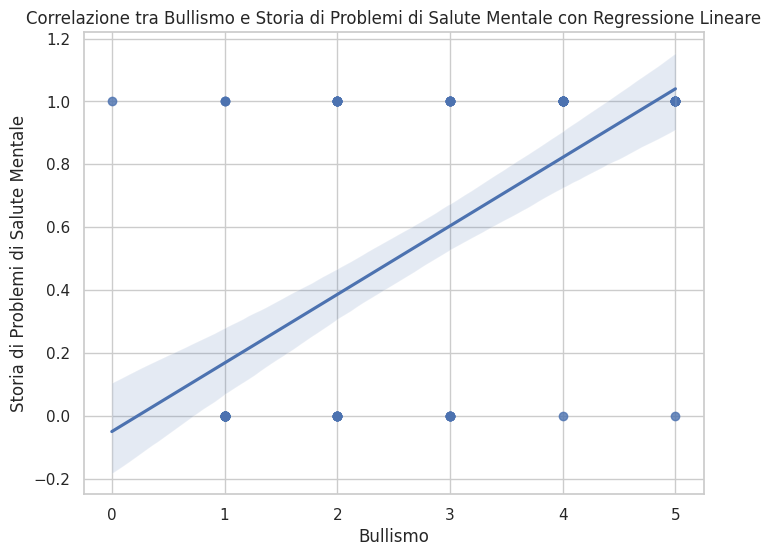

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supponendo che 'stress_test_df' sia il tuo DataFrame

# Correlazione tra ansia e prestazioni accademiche con regressione lineare
plt.figure(figsize=(8, 6))
sns.regplot(x='anxiety_level', y='academic_performance', data=stress_test_df)
plt.title('Correlazione tra Ansia e Prestazioni Accademiche con Regressione Lineare')
plt.xlabel('Livello di Ansia')
plt.ylabel('Prestazioni Accademiche')
plt.show()

# Correlazione tra qualità del sonno e depressione con regressione lineare
plt.figure(figsize=(8, 6))
sns.regplot(x='sleep_quality', y='depression', data=stress_test_df)
plt.title('Correlazione tra Qualità del Sonno e Depressione con Regressione Lineare')
plt.xlabel('Qualità del Sonno')
plt.ylabel('Livello di Depressione')
plt.show()

# Correlazione tra bullismo e storia di problemi di salute mentale con regressione lineare
plt.figure(figsize=(8, 6))
sns.regplot(x='bullying', y='mental_health_history', data=stress_test_df)
plt.title('Correlazione tra Bullismo e Storia di Problemi di Salute Mentale con Regressione Lineare')
plt.xlabel('Bullismo')
plt.ylabel('Storia di Problemi di Salute Mentale')
plt.show()

The correlation between anxiety level and academic perofmance is -0.65. This is a moderate negative correlation: the people who think they perform better also experience less anxiety.
The correlation between depression and sleep quality is -0.69. This is a moderate/strong negative correlation, people who sleep better less likely to report higher levels of depression.
The correlation between bullying and history of mental illness is 0.62. This is a moderate positive correlation: people who are the victims of bullying also more likely to have history of mental illness.

In [44]:
#                     General Exploration:
# Which factor (Psychological, Physiological, Environmental, Academic, Social) has the highest number of students reporting negative experiences or conditions?
#Separate the mental factor columns
mental_pos = stress_test_df[["anxiety_level", "depression", "self_esteem", "mental_health_history"]]
#Create a dictionary
mental_pos_count = {}
#Iterate over the pyschological factor columns
for column,row in mental_pos.items():
    #If it is anxiety or depression we count the people who are in the upper 40%
    if column == "anxiety_level" or column == "depression":
        count = (row > np.percentile(mental_pos[column],60))
        #Add the resulting dataset to the dictionary under the column's name
        mental_pos_count[column] = count
    #Everyone who had history with mental diseases get counted
    elif column == "mental_health_history":
        count = row == 1
        #Add the resulting dataset to the dictionary under the column's name
        mental_pos_count[column] = count
    #People who are in the lower 40% get counted for self-esteem
    else:
        count = (row < np.percentile(mental_pos[column],40))
        #Add the resulting dataset to the dictionary under the column's name
        mental_pos_count[column] = count
#Create a pandas dataframe
mental_pos_df = pd.DataFrame(mental_pos_count)
#Count every row where atleast one value is true
mental_number = len((mental_pos_df[(mental_pos_df >= 1).sum(axis=1) >= 1]))


In [45]:
#Separate the mental factor columns
physical = stress_test_df[["headache", "blood_pressure", "sleep_quality", "breathing_problem"]]
#Create a dictionary
physical_dict = {}
#Iterate over the physical factor columns
for column,row in physical.items():
    #People in the upper 40% for headache, breathing problems or blood pressure get counted
    if column == "headache" or column == "breathing problem" or column == "blood_pressure":
        count = (row > np.percentile(physical[column],60))
        #Add the resulting dataset to the dictionary under the column's name
        physical_dict[column] = count
    #People in the lower 40% for sleep quality get counted
    else:
        count = (row < np.percentile(physical[column],40))
        #Add the resulting dataset to the dictionary under the column's name
        physical_dict[column] = count
#Create a pandas dataframe
physical_df = pd.DataFrame(physical_dict)
#Count every row where atleast one value is true
physical_number = len((physical_df[(physical_df >= 1).sum(axis=1) >= 1]))

In [46]:
#Separate the environmental factor columns
env = stress_test_df[["living_conditions", "safety", "basic_needs", "noise_level"]]
#Create a dictionary
env_dict = {}
#Iterate over the environmental factor columns
for column,row in env.items():
    #People in the upper 40% for noise level get counted
    if column == "noise_level":
        count = (row > np.percentile(env[column],60))
        #Add the resulting dataset to the dictionary under the column's name
        env_dict[column] = count
    #People in the lower 40% for sleep quality get counted
    else:
        count = (row < np.percentile(env[column],40))
        #Add the resulting dataset to the dictionary under the column's name
        env_dict[column] = count
#Create a pandas dataframe
env_df = pd.DataFrame(env_dict)
#Count every row where atleast one value is true
env_number = len((env_df[(env_df >= 1).sum(axis=1) >= 1]))

In [47]:
#Separate the academic factor columns
acad = stress_test_df[["academic_performance", "study_load", "teacher_student_relationship", "future_career_concerns"]]
#Create a dictionary
acad_dict = {}
#Iterate over the academic factor columns
for column,row in acad.items():
    #People in the upper 40% for study load and future career concners get counted
    if column == "study_load" or column == "future_career_concerns":
        count = (row > np.percentile(acad[column],60))
        #Add the resulting dataset to the dictionary under the column's name
        acad_dict[column] = count
    #People in the lower 40% for academic performance or teacher student relationship get counted
    else:
        count = (row < np.percentile(acad[column],40))
        #Add the resulting dataset to the dictionary under the column's name
        acad_dict[column] = count
#Create a pandas dataframe
acad_df = pd.DataFrame(acad_dict)
#Count every row where atleast one value is true
acad_number = len((acad_df[(acad_df >= 1).sum(axis=1) >= 1]))

In [48]:
#Separate the social factor columns
social = stress_test_df.iloc[:, 16:20]
#Create a dictionary
social_dict = {}
#Iterate over the academic factor columns
for column,row in social.items():
    #People in the upper 40% for peer pressure, extracurricular activities and bullying get counted
    if column == "peer_pressure" or column == "extracurricular_activities" or column == "bullying":
        count = (row > np.percentile(social[column],60))
        #Add the resulting dataset to the dictionary under the column's name
        social_dict[column] = count
    #People in the lower 40% for social support get counted
    else:
        count = (row < np.percentile(social[column],40))
        #Add the resulting dataset to the dictionary under the column's name
        social_dict[column] = count
#Create a pandas dataframe
social_df = pd.DataFrame(social_dict)
#Count every row where atleast one value is true
social_number = len((social_df[(social_df >= 1).sum(axis=1) >= 1]))

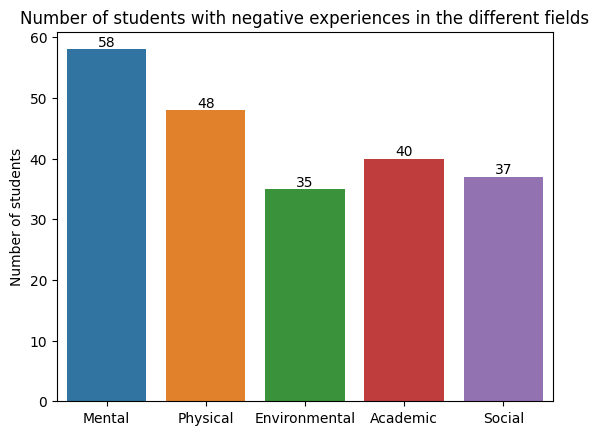

In [49]:
#Create a pandas series from the numbers
neg = pd.Series([mental_number, physical_number, env_number, acad_number, social_number])
#Choose column names
col_names = ["Mental", "Physical", "Environmental", "Academic", "Social"]
#Create the barplot
ax = sns.barplot(x = col_names, y = neg.values)
#Name the plot
ax.set(title="Number of students with negative experiences in the different fields")
#Show the number on top of the bar
ax.bar_label(ax.containers[0])
#Set the y label
ax.set_ylabel("Number of students");


In [51]:
#                     General Exploration:
# Which specific feature within each factor has the most significant impact on student stress, based on the dataset?
#Choose which factor has the biggest impact on stress level within each variable subgroup.
correl = stress_test_df.corr()
print("In mental variables", round(correl.iloc[-1:,0:4].abs().max(),2).index.max().replace("_", " "), "has the biggest impact.")
print("In physical variables", round(correl.iloc[-1:,4:8].abs().max(),2).index.max().replace("_", " "), "has the biggest impact.")
print("In environmental variables", round(correl.iloc[-1:,8:12].abs().max(),2).index.max()), "has the biggest impact."
print("In academic variables", round(correl.iloc[-1:,12:16].abs().max(),2).index.max().replace("_", " "), "has the biggest impact.")
print("In social variables", round(correl.iloc[-1:,16:20].abs().max(),2).index.max().replace("_", " "), "has the biggest impact.")

In mental variables self esteem has the biggest impact.
In physical variables sleep quality has the biggest impact.
In environmental variables safety
In academic variables teacher student relationship has the biggest impact.
In social variables social support has the biggest impact.


# **PERCENTUALE DI ACCURATEZZA**

In [65]:
# Definisci le colonne di input (X) e l'etichetta target (y)
features = [
    'livello_ansia', 'autostima', 'storia_salute_mentale', 'depressione',
    'mal_di_testa', 'pressione_sanguigna', 'qualità_del_sonno', 'problema_respiratorio',
    'livello_rumore', 'condizioni_di_vita', 'sicurezza', 'esigenze_di_base',
    'prestazioni_accademiche', 'carico_di_studio', 'relazione_studenti_insegnanti', 'preoccupazioni_di_carriera_futura',
    'supporto_sociale', 'pressione_tra_pari', 'attività_extracurriculari', 'bullismo'
]
target_column = 'stress'  # Sostituisci con il nome effettivo della colonna target

# Creazione di X (features) e y (etichette)
X = df[features]
y = df[target_column]

# Suddivisione del dataset in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Addestramento del modello (usando RandomForest come esempio)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predizioni sul set di test
y_pred = model.predict(X_test)

# Calcolo della percentuale di accuratezza
accuracy = accuracy_score(y_test, y_pred)

# Stampa della percentuale di accuratezza
print(f"Percentuale di Accuratezza: {accuracy * 100:.2f}%")

KeyError: ignored

In [ ]:
User
ho un file csv con un set di dati. Questo set di dati contiene circa 20 funzionalità che creano il maggiore impatto sullo stress di uno studente. Le caratteristiche sono selezionate scientificamente considerando 5 fattori principali: fattori psicologici, fisiologici, sociali, ambientali e accademici. Alcuni di essi sono:
Fattori psicologici => 'livello_ansia', 'autostima', 'storia_salute_mentale', 'depressione',
Fattori fisiologici => 'mal di testa', 'pressione_sanguigna', 'qualità_del_sonno', 'problema_respiratorio
Fattori ambientali => 'livello_rumore' , 'condizioni_di_vita', 'sicurezza', 'esigenze_di_base',
Fattori accademici => 'prestazioni_accademiche', 'carico_di_studio', 'relazione_studenti_insegnanti', 'preoccupazioni_di_carriera_futura',
Fattore sociale => 'supporto_sociale', 'pressione_tra pari', 'attività_extracurriculari', ' bullismo'.

Sviluppa un modello preciso di machine learning (che posso subito compilare senza dove aggiungere niente) che analizza i dati tramite un modello di clustering e risponda a tutte queste esigenze in modo completo e che restituisca, oltre alle risposte, anche delle tabelle:                                                                                                                             Statistiche descrittive:

1) Quanti studenti ci sono nel set di dati?
2) Qual è il livello medio di ansia degli studenti nel set di dati?
3) Quanti studenti hanno segnalato una storia di problemi di salute mentale?
Fattori psicologici:

1) Quanti studenti hanno un livello di autostima inferiore alla media?
2) Quale percentuale di studenti ha riferito di aver sperimentato la depressione?
Fattori fisiologici:

1) Quanti studenti soffrono frequentemente di mal di testa?
2) Qual è la lettura media della pressione arteriosa tra gli studenti?
3) Quanti studenti valutano scarsa la qualità del loro sonno?
Fattori ambientali:

1) Quanti studenti vivono in condizioni con elevati livelli di rumore?
2) Quale percentuale di studenti si sente insicura nelle proprie condizioni di vita?
3) Quanti studenti hanno riferito di non aver soddisfatto i loro bisogni primari?
Fattori accademici:

1) Quanti studenti valutano il loro rendimento scolastico inferiore alla media?
2) Qual è il carico di studio medio riportato dagli studenti?
3) Quanti studenti hanno preoccupazioni riguardo alla loro futura carriera?
Fattori sociali:

1) Quanti studenti sentono di avere un forte sostegno sociale?
2) Qual è la percentuale di studenti che hanno subito episodi di bullismo?
3) Quanti studenti partecipano alle attività extrascolastiche?
Analisi comparativa:

1) Esiste una correlazione tra livello di ansia e rendimento scolastico?
2) Gli studenti con una scarsa qualità del sonno riportano anche livelli più elevati di depressione?
3) Gli studenti che subiscono bullismo hanno maggiori probabilità di avere una storia di problemi di salute mentale?
Esplorazione generale:

1) Quale fattore (psicologico, fisiologico, ambientale, accademico, sociale) ha il maggior numero di studenti che riferiscono esperienze o condizioni negative?
2) Ci sono tendenze o modelli evidenti quando si confrontano fattori diversi?
3) Quale caratteristica specifica di ciascun fattore ha l'impatto più significativo sullo stress degli studenti, in base al set di dati?